In [1]:
import gender_guesser.detector as gender
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

In [2]:
df = pd.read_csv("coleccion_anagrama.csv")

# Casting de los datos para su análisis
df['precio'] = df['precio'].str.replace(' €', '')
df['precio'] = pd.to_numeric(df["precio"], errors='coerce')

display(df.head(5))

,isbn,ean,código,título,autor,precio,páginas,fecha_publicación,colección,traducción,sinopsis,ebook,tops_amazon
0,978-84-339-8106-6,9788433981066,PN 1066,En verano,"Knausgård, Karl Ove",18.9,400.0,24/11/2021,Panorama De Narrativas,"Asunción Lorenzo, Kirsti Baggethun",La portentosa culminación del Cuarteto de las ...,1,"['3,322,967 en Tienda Kindle', '6,137 en Biogr..."
1,978-84-339-8113-4,9788433981134,PN 1073,Historia de los abuelos que no tuve,"Jablonka, Ivan",21.9,424.0,23/02/2022,Panorama De Narrativas,Agustina Blanco,"La historia de los abuelos del autor, muertos ...",0,"['1,835,602 en Libros', '63,596 en Memorias (L..."
2,978-84-339-8107-3,9788433981073,PN 1067,Desde dentro,"Amis, Martin",24.9,624.0,17/11/2021,Panorama De Narrativas,Jesús Zulaika Goicoechea,Un libro ambicioso y deslumbrante que mezcla v...,1,"['804,658 en Tienda Kindle', '641 en Biografía..."
3,978-84-339-8110-3,9788433981103,PN 1070,Sed,"Nothomb, Amélie",17.9,128.0,02/02/2022,Panorama De Narrativas,Sergi Pàmies,Una apasionante y nothombiana reelaboración de...,1,"['377,300 en Tienda Kindle', '844 en Literatur..."
4,978-84-339-8111-0,9788433981110,PN 1071,Nacido de ninguna mujer,"Bouysse, Franck",19.9,304.0,02/02/2022,Panorama De Narrativas,Rosa Alapont Calderaro,Un manuscrito. Una joven enfrentada a un desti...,1,"['2,090,463 en Libros', '99,130 en Libros en e..."


In [3]:
# Añadimos nuevas variables

# Año: extracción desde el atributo 'fecha_publicación'
df['año'] = pd.DatetimeIndex(df['fecha_publicación']).year

# Género: inferido a partir del nombre mediante la librería 'gender_guesser'
d = gender.Detector()
df[['apellido_autor', 'nombre_autor']] = df['autor'].loc[df['autor'].str.split().str.len() == 2].str.split(expand=True)

def guess_col_gender(col, suff='_gender', df=df, d=d):
    '''
    Infiere el género de una columna 'nombre' de un dataframe
    y devuelve un nuevo atributo ['género']
    '''
    nombres = df['nombre_autor'].tolist()
    género = [d.get_gender(nombres) for nombres in nombres]
    df['género'] = género
    
    return df

guess_col_gender(df['nombre_autor'])

# La función devuelve los siguientes valores que debemos recodificar
df['género'] = df['género'].replace(['mostly_male', 'male'],'Hombre')
df['género'] = df['género'].replace(['mostly_female', 'female'],'Mujer')
df['género'] = df['género'].replace(['andy'],'unknown')

In [4]:
# Eliminamos los títulos de 2022 que alteran la línea temporal ya que
# no hemos completado el año.
# Por otra parte, observamos valores atípicos en el año 2006 (se multiplica por 10),
# por lo que eliminamos dichos registros en el análisis.

df = df[df['año'] != 2022]
df = df[df['año'] != 2006]

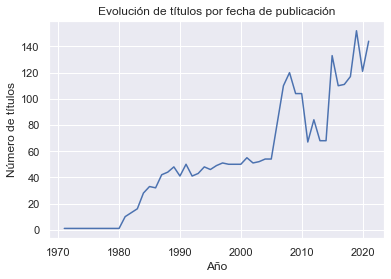

In [5]:
# EVOLUCIÓN DE TÍTULOS

sns.set_theme()
df_titulos = pd.DataFrame(df.groupby('año')['título'].agg(np.count_nonzero))

sns.lineplot(data=df_titulos, x='año', y='título')
plt.ylabel('Número de títulos')
plt.xlabel('Año')
plt.title('Evolución de títulos por fecha de publicación')
plt.show()

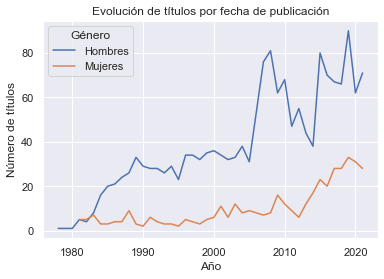

In [6]:
# EVOLUCIÓN DE TÍTULOS POR GÉNERO DEL AUTOR/A
df_género = df.loc[df['género'].isin(['Hombre', 'Mujer'])]
df_género
df_ = pd.DataFrame(df_género.groupby(['año', 'género'])['título'].agg(np.count_nonzero))

sns.lineplot(data=df_, x='año', y='título', hue = 'género')
plt.ylabel('Número de títulos')
plt.xlabel('Año')
plt.title('Evolución de títulos por fecha de publicación')
plt.legend(title='Género', loc='upper left', labels=['Hombres', 'Mujeres'])
plt.show()

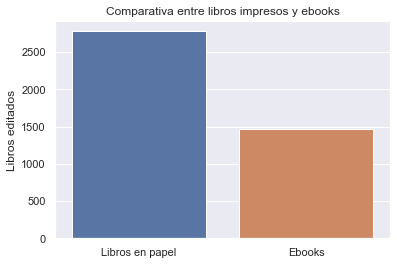

In [7]:
# EVOLUCIÓN DE EBOOKS POR FECHA DE PUBLICACIÓN
n_books = len(df)
n_ebooks = np.sum(df['ebook'])

sns.barplot(x=['Libros en papel', 'Ebooks'], y=[n_books, n_ebooks])
plt.ylabel('Libros editados')
plt.title('Comparativa entre libros impresos y ebooks')
plt.show()

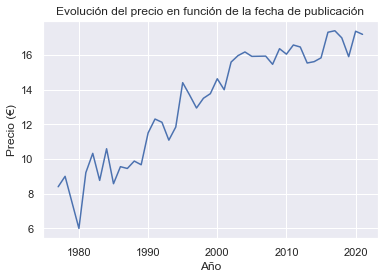

In [8]:
# EVOLUCIÓN DE PRECIOS POR AÑO DE PUBLICACIÓN
df_precio = pd.DataFrame(df.groupby('año')['precio'].agg(np.mean))

sns.lineplot(data=df_precio, x='año', y='precio')
plt.ylabel('Precio (€)')
plt.xlabel('Año')
plt.title('Evolución del precio en función de la fecha de publicación')
plt.show()